In [1]:
from ABCD_ML import *
import os
import numpy as np

In [2]:
# Base data directories, 2.0 release with most of the phenotype information
main_dr = '/home/sage/work/'

nda_dr = main_dr + 'ABCD2p0NDA/'

# This folder contains the re-released 2.0.1 fixed MRI derived measurements
nda_dr2 = main_dr + 'ABCDFixRelease2p0p1'

#This file stores the name mapping
map_file = os.path.join(nda_dr2, 'Fix Release Notes 2.0.1_Public', '24. ABCD_Release_2.0.1_Updates',
                        'abcd_2.0.1_mapping.csv')

# Destr atlas structural MRI rois
data1 = os.path.join(nda_dr2, 'mrisst02.txt')
data2 = os.path.join(nda_dr2,'abcd_tfsstabwdp101.txt')
data3 = os.path.join(nda_dr2, 'abcd_tfsstabwdp201.txt')

# Family ID
strat1 = os.path.join(nda_dr, 'acspsw03.txt')

# This file contains the NIH toolbox scores
target_loc = nda_dr + 'abcd_sst02.txt'

In [3]:
ML = ABCD_ML(log_dr = None)
ML.Load_Name_Map(loc = map_file,
                 dataset_type= 'explorer',
                 source_name_col= 'nda_name',
                 target_name_col= 'deap_name')

exp_name = My_ML_Exp
log_dr = None
existing_log = append
verbose = True
exp log dr setup at: None
log file at: None
Default params set:
notebook = True
use_abcd_subject_ids = False
low memory mode = False
strat_u_name = _Strat
random state = 534
n_jobs = 1
dpi = 100
mp_context = spawn
ABCD_ML object initialized
Setting default load params, as they have not been set!

Default load params set within self.default_load_params.
----------------------
dataset_type: basic
subject_id: src_subject_id
eventname: None
eventname_col: eventname
overlap_subjects: False
merge: inner
na_values: ['777', '999']
drop_na: True
drop_or_na: drop

To change the default load params, call self.Set_Default_Load_Params()

Loading /home/sage/work/ABCDFixRelease2p0p1/Fix Release Notes 2.0.1_Public/24. ABCD_Release_2.0.1_Updates/abcd_2.0.1_mapping.csv  with dataset type: explorer
Loading new name_map from file!


In [4]:
# These drop keys are to narrow in on only the subcortical volumes of interest
drop_keys = ['_csf', '.white.matter', '.vent', '_cort.desikan_', 'all_beta']

# These are to specify the contrasts we want to load
contrast_keys = ['tfmri_sst_all_correct.go.vs.fixation_beta_', 
                 'tfmri_sst_all_correct.stop.vs.correct.go_beta_',
                 'tfmri_sst_all_incorrect.stop.vs.correct.go_beta_']

ML.Load_Data(loc = [data1, data2, data3],
             inclusion_keys = contrast_keys,
             drop_keys=drop_keys,
             clear_existing=True,
             drop_na=False,
             subject_id='src_subject_id',
             dataset_type = 'basic',
             filter_outlier_std = 10)

Cleared loaded data.

Loading /home/sage/work/ABCDFixRelease2p0p1/mrisst02.txt  with dataset type: basic
dropped ['collection_id', 'mrisst02_id', 'dataset_id', 'subjectkey', 'interview_date', 'interview_age', 'sex', 'tfmri_sa_beta_visitid', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type
Loading /home/sage/work/ABCDFixRelease2p0p1/abcd_tfsstabwdp101.txt  with dataset type: basic
dropped ['collection_id', 'abcd_tfsstabwdp101_id', 'dataset_id', 'subjectkey', 'interview_age', 'interview_date', 'sex', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type
Loading /home/sage/work/ABCDFixRelease2p0p1/abcd_tfsstabwdp201.txt  with dataset type: basic
dropped ['collection_id', 'abcd_tfsstabwdp201_id', 'dataset_id', 'subjectkey', 'interview_age', 'interview_date', 'sex', 'collection_title', 'study_cohort_name'] columns by default  due to dataset type

Dropped 578 columns per passed drop_keys argument
Keeping 495 columns per passed inclus

In [5]:
ML.Load_Targets(target_loc,
                dataset_type='basic',
                col_name='tfmri_sst_all_beh_total_meanrt',
                data_type='float',
                filter_outlier_percent=(.1, .2),
                clear_existing=True)

cleared targets.

Loading /home/sage/work/ABCD2p0NDA/abcd_sst02.txt  with dataset type: basic
Dropped 0 cols for all missing values
Dropped 0 rows for missing values, based on the provided drop_na param: True with actual na_thresh: 0
Loaded rows with NaN remaining: 0

loading: tfmri_sst_all_beh_total_mean.rt
Filtering for outliers, dropping rows with params:  (0.001, 0.998)
Min-Max value (pre-filter): -692.0 702.69230769
Min-Max value (post outlier filtering): -248.91666667 568.75454545

Dropped 30 rows based on filter input params, e.g. filter outlier percent, drop cat, ect...
Loaded Shape: (9568, 1)
All loaded targets
0 : tfmri_sst_all_beh_total_mean.rt



In [6]:
ML.Load_Covars(loc = data1,
               col_name = ['sex', 'interview_age'],
               drop_na = False,
               nan_as_class = True,
               data_type = ['c', 'c'],
               clear_existing = True)

cleared covars.

Loading /home/sage/work/ABCDFixRelease2p0p1/mrisst02.txt  with dataset type: basic
Dropped 0 cols for all missing values
Loaded rows with NaN remaining: 1
loading: sex
loading: interview_age
Loaded Shape: (8918, 2)


Set to overlapping loaded subjects.
-- sex --


,Original_Name,Counts,Frequency
Internal_Name,,,
0,F,4185,0.488788
1,M,4376,0.511096
2,nan,1,0.000117


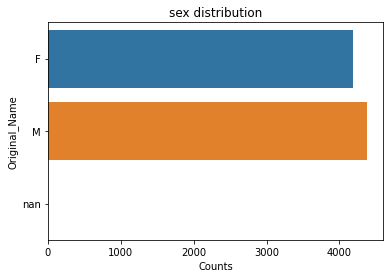


-- interview_age --


,Original_Name,Counts,Frequency
Internal_Name,,,
0,107,103,0.012030
1,108,643,0.075099
2,109,443,0.051740
3,110,384,0.044849
4,111,318,0.037141
5,112,274,0.032002
6,113,281,0.032819
7,114,301,0.035155
8,115,318,0.037141


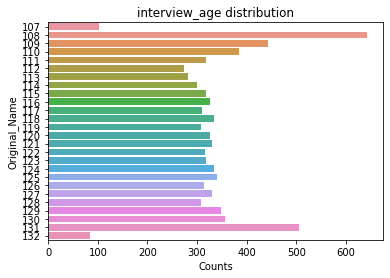

In [7]:
ML.Show_Covars_Dist()

In [8]:
ML.covars.loc[ML.covars.index[:500],'interview_age'] = np.nan

In [9]:
ML.Train_Test_Split(test_size=0.2,
                    random_state=1001)

Calling Prepare_All_Data() to change the default merge behavior call it again!
Preparing final data, in self.all_data
Any changes to loaded data, covars or strat will not be included, from now on.

Final data (w/ target) for modeling loaded shape: (8562, 498)
Performing split on 8562 subjects!
random_state: 1001
Test split size: 0.2

Performed train test split
Train size: 6849
Test size:  1713


In [10]:
spec = Problem_Spec(problem_type = 'regression',
                    scorer = 'r2',
                    random_state = 1001,
                    n_jobs = 8)

imputers = [Imputer(extra_params={}, obj='mean', scope='float'),
            Imputer(extra_params={}, obj='median', scope='cat')]
            #Imputer(obj='iterative', base_model=Model('dt'), scope='all')]

ohe_sex = Transformer(obj="one hot encoder", scope=Duplicate(['interview_age', 'sex']))

pipeline = Model_Pipeline(imputers=imputers,
                          transformers=[ohe_sex],
                          feat_selectors = Feat_Selector(obj='univariate selection', scope='interview_age'),
                          model = Model('dt', scope=['sex'], params=1),
                          param_search = Param_Search('RandomSearch'))

In [11]:
eval_results = ML.Evaluate(model_pipeline = pipeline,
                           problem_spec = spec,
                           splits = 3,
                           n_repeats = 1)

Setting default ML verbosity settings!
Note, if the following values are not desired, call self.Set_Default_ML_Verbosity()
Default ML verbosity set within self.default_ML_verbosity.
----------------------
save_results: False
progress_bar: True
compute_train_score: False
show_init_params: True
fold_name: False
time_per_fold: False
score_per_fold: False
fold_sizes: False
best_params: False
save_to_logs: False

Model_Pipeline
--------------
imputers=\
[Imputer(extra_params={}, obj='mean', scope='float'),
 Imputer(extra_params={}, obj='median', scope='cat')]

scalers=\
Scaler(extra_params={}, obj='standard')

transformers=\
[Transformer(extra_params={}, obj='one hot encoder', scope='interview_age'),
 Transformer(extra_params={}, obj='one hot encoder', scope='sex')]

feat_selectors=\
Feat_Selector(extra_params={}, obj='univariate selection',
              scope='interview_age')

model=\
Model(extra_params={}, obj='dt', params=1, scope=['sex'])

param_search=\
Param_Search(mp_context='spawn'




Validation Scores
_________________
Scorer:  r2
Mean Validation score:  -0.00033892552790822555
Std in Validation score:  0.0005478398088376167

